In [1]:
from os.path import join
import numpy as np
from numpy.linalg import svd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 18

This example consists of gene data for 216 patients, 121 of whom have ovarian cancer and 95 of whom do not. For each patient there is a vector of data containing the expression of 4000 genes. Each row is a patient and each column is a gene (*ie* the PCA convention).

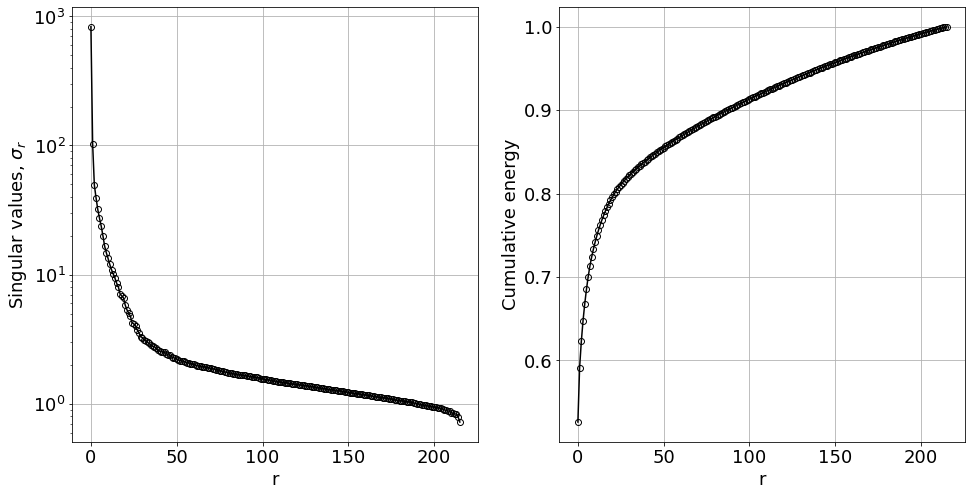

In [2]:
# Figure 1.14

obs = np.loadtxt(join('..', 'DATA', 'ovariancancer_obs.csv'), delimiter=',')
with open(join('..', 'DATA', 'ovariancancer_grp.csv')) as f:
    # seem to have an empty line, so clean up
    grp = [line for line in f.read().split('\n') if line in ('Cancer', 'Normal')]
assert len(grp) == len(obs)

# RHD: No mean centring and variance normalisation before the SVD ?
U, S, VT = svd(obs, full_matrices=False)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True)
axs[0].semilogy(S, '-o', mfc='none', color='black')
axs[0].grid(True)
axs[0].set_xlabel('r')
axs[0].set_ylabel(r'Singular values, $\sigma_r$')
axs[1].plot(np.cumsum(S) / S.sum(), '-o', mfc='none', color='black')
axs[1].set_xlabel('r')
axs[1].set_ylabel('Cumulative energy')
axs[1].grid(True)

The PCA modes - the *eigen* gene sequences are the rows of V<sup>T</sup>. Show the first three.

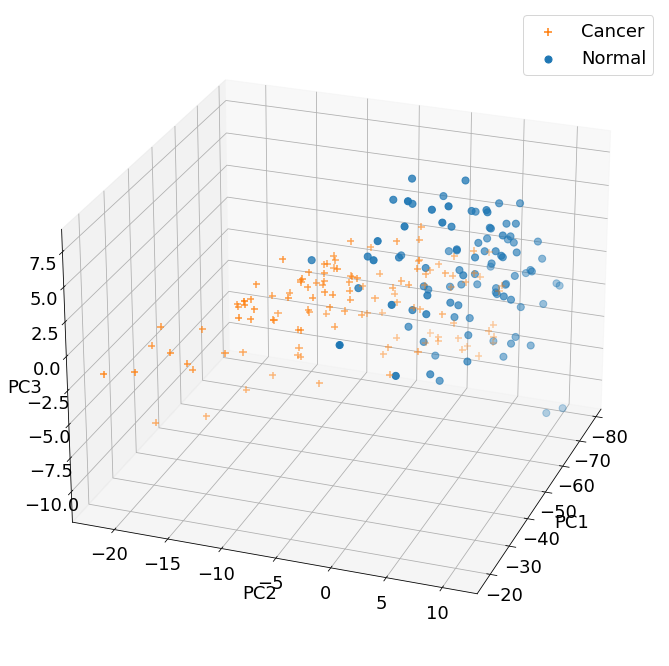

In [3]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='3d'))

# The first 3 PCA modes as x, y, z in a 3d plot
x, y, z = VT[:3] @ obs.T
cancer = np.asarray(grp) == 'Cancer'
ax.scatter(x[cancer], y[cancer], z[cancer], marker='+', color='C1', s=50, label='Cancer')
ax.scatter(x[~cancer], y[~cancer], z[~cancer], marker='o', color='C0', s=50, label='Normal')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.view_init(25, 20)